# Emotions Detection in Text

In [1]:
# EDA
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# Load Dataset
df = pd.read_csv("../data/emotion_dataset_raw.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
# Value Counts
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [44]:
len(df)

34792

<Axes: xlabel='Emotion', ylabel='count'>

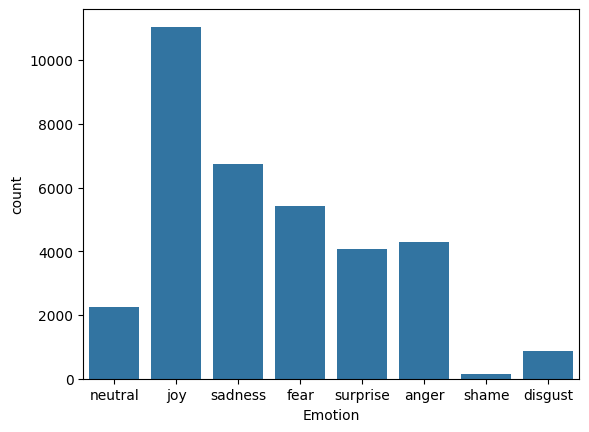

In [5]:
# Plot
sns.countplot(x='Emotion',data=df)

In [6]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [7]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [8]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

## We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [9]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [10]:
# Features & Labels
Xfeatures = df['Text']
ylabels = df['Emotion']

In [11]:
!pip install ollama

In [12]:
# import ollama
# import pandas as pd

# # Load the same dataset used for training/testing
# df = pd.read_csv("../data/emotion_dataset_raw.csv")  # adjust the path if needed
# emotion_labels = ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame','disgust']


# # Define your LLM prompt function
# def classify_emotion_llm(text):
#     prompt = f"Classify the emotion in the following sentence: '{text}'. Choose from: ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']. Answer in one word."
#     # ret = "Unknown"
#     while True:
#         response = ollama.chat(
#             model='mistral',  # You can switch to 'tinyllama', 'llama2', etc.
#             messages=[{"role": "user", "content": prompt}]
#         )
#         raw = response['message']['content'].strip()
#         for label in emotion_labels:
#             if label.lower() in raw.lower():
#                 return label
#     # return "Unknown"

# # Apply to a sample of the dataset for speed (e.g., first 100 rows)
# df_sample = df[['Text']].dropna().head(100).copy()
# df_sample['LLM_Prediction'] = df_sample['Text'].apply(classify_emotion_llm)

# # Show results
# print(df_sample[['Text', 'LLM_Prediction']].head())

# # Save output
# df_sample.to_csv("llm_predictions_sample.csv", index=False)

In [13]:
# from sklearn.metrics import accuracy_score

# # Load ground truth labels
# df_truth = pd.read_csv("../data/emotion_dataset_raw.csv")
# df_truth = df_truth[['Text', 'Emotion']].dropna().head(100).reset_index(drop=True)


# # Load LLM predictions
# df_pred = pd.read_csv("llm_predictions_sample.csv")
# df_pred = df_pred[['Text', 'LLM_Prediction']].dropna().reset_index(drop=True)

# # Merge and normalize
# df_compare = df_truth.copy()
# df_compare['LLM_Prediction'] = df_pred['LLM_Prediction'].str.strip().str.lower()
# df_compare['Emotion'] = df_compare['Emotion'].str.strip().str.lower()

# # Overall accuracy
# overall_accuracy = accuracy_score(df_compare['Emotion'], df_compare['LLM_Prediction'])
# print(f"Overall Accuracy: {overall_accuracy:.2f}")

# # Accuracy per emotion
# print("\nAccuracy per Emotion:")
# for emotion in df_compare['Emotion'].unique():
#     subset = df_compare[df_compare['Emotion'] == emotion]
#     correct = (subset['Emotion'] == subset['LLM_Prediction']).sum()
#     total = len(subset)
#     print(f"{emotion.title()}: {correct}/{total} = {correct/total:.2f}")

In [14]:
# df_compare['Emotion'].unique()

In [36]:
import ollama
import pandas as pd


def llm_flow(model_name):
    def classify_emotion_llm(text):
        prompt = f"Classify the emotion in the following sentence: '{text}'. Choose from: ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']. Answer in one word."
        while True:
            response = ollama.chat(
                model=model_name, 
                messages=[{"role": "user", "content": prompt}]
            )
            raw = response['message']['content'].strip()
            for label in emotion_labels:
                if label.lower() in raw.lower():
                    return label

    # Apply to a sample of the dataset for speed (e.g., first 100 rows)
    df_sample = df[['Text']].dropna().copy()
    df_sample['LLM_Prediction'] = df_sample['Text'].apply(classify_emotion_llm)

    # Show results
    print(df_sample[['Text', 'LLM_Prediction']].head())

    # Save output
    df_sample.to_csv(model_name + "_predictions_sample.csv", index=False)
    
    df_truth = pd.read_csv("../data/emotion_dataset_raw.csv")
    df_truth = df_truth[['Text', 'Emotion']].dropna().reset_index(drop=True)

    # Load LLM predictions
    df_pred = pd.read_csv(model_name+"_predictions_sample.csv")
    df_pred = df_pred[['Text', 'LLM_Prediction']].dropna().reset_index(drop=True)

    # Merge and normalize
    df_compare = df_truth.copy()
    df_compare['LLM_Prediction'] = df_pred['LLM_Prediction'].str.strip().str.lower()
    df_compare['Emotion'] = df_compare['Emotion'].str.strip().str.lower()

    # Overall accuracy
    overall_accuracy = accuracy_score(df_compare['Emotion'], df_compare['LLM_Prediction'])
    print(f"Overall Accuracy: {overall_accuracy:.2f}")

    # Accuracy per emotion
    print("\nAccuracy per Emotion:")
    for emotion in df_compare['Emotion'].unique():
        subset = df_compare[df_compare['Emotion'] == emotion]
        correct = (subset['Emotion'] == subset['LLM_Prediction']).sum()
        total = len(subset)
        print(f"{emotion.title()}: {correct}/{total} = {correct/total:.2f}")
    print(model_name, "finish")


In [41]:
ollama_models = [
    "mistral",
    "llama2",
    "tinyllama",
    # "phi",
    # "gemma"
]

In [43]:
llm_flow(ollama_models[1])

KeyboardInterrupt: 

llm_flow(ollama_models[0])

Accuracy per Emotion:
Neutral: 1912/2254 = 0.85
Joy: 5749/11045 = 0.52
Sadness: 3712/6722 = 0.55
Fear: 1709/5410 = 0.32
Surprise: 470/4062 = 0.12
Anger: 2722/4297 = 0.63
Shame: 110/146 = 0.75
Disgust: 201/856 = 0.23
mistral finish


llm_flow(ollama_models[1])


Accuracy per Emotion:
Neutral: 276/2254 = 0.12
Joy: 2316/11045 = 0.21
Sadness: 1411/6722 = 0.21
Fear: 1139/5410 = 0.21
Surprise: 81/4062 = 0.02
Anger: 50/4297 = 0.01
Shame: 14/146 = 0.10
Disgust: 241/856 = 0.28
tinyllama finish

In [27]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics import accuracy_score
import pandas as pd

# Define emotion labels
emotion_labels = ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame','disgust']

def hf_flow(model_name="sentence-transformers/all-MiniLM-L6-v2"):
    # Load SentenceTransformer model
    model = SentenceTransformer(model_name)

    # Precompute label embeddings
    label_embeddings = model.encode(emotion_labels, convert_to_tensor=True)

    # Define emotion classifier
    def classify_emotion(text):
        if not isinstance(text, str):
            return "unknown"
        embedding = model.encode(text, convert_to_tensor=True)
        scores = util.pytorch_cos_sim(embedding, label_embeddings)[0]
        best_idx = scores.argmax().item()
        return emotion_labels[best_idx].lower()

    # Load dataset
    df = pd.read_csv("../data/emotion_dataset_raw.csv")
    # df_sample = df[['Text']].dropna().copy().head(100)
    df_sample = df[['Text']].dropna().copy()
    
    df_sample['LLM_Prediction'] = df_sample['Text'].apply(classify_emotion)

    # Save predictions
    output_file = model_name.replace("/", "_") + "_predictions_sample.csv"
    df_sample.to_csv(output_file, index=False)

    # Prepare ground truth
    df_truth = df[['Text', 'Emotion']].dropna().reset_index(drop=True)
    df_pred = df_sample[['Text', 'LLM_Prediction']].reset_index(drop=True)

    # Merge and normalize labels
    df_compare = df_truth.copy()
    df_compare['LLM_Prediction'] = df_pred['LLM_Prediction'].str.strip().str.lower()
    df_compare['Emotion'] = df_compare['Emotion'].str.strip().str.lower()

    # Filter only valid labels
    df_compare = df_compare[df_compare['LLM_Prediction'].isin(emotion_labels)]

    # Accuracy
    overall_accuracy = accuracy_score(df_compare['Emotion'], df_compare['LLM_Prediction'])
    print(f"\n🔍 Overall Accuracy: {overall_accuracy:.2f}")

    print("\n📊 Accuracy per Emotion:")
    for emotion in emotion_labels:
        subset = df_compare[df_compare['Emotion'] == emotion]
        if len(subset) > 0:
            correct = (subset['Emotion'] == subset['LLM_Prediction']).sum()
            print(f"{emotion.title()}: {correct}/{len(subset)} = {correct/len(subset):.2f}")
        else:
            print(f"{emotion.title()}: 0/0 = N/A")

    print(f"\n✅ {model_name} finished.")


In [ ]:
hf_flow("sentence-transformers/all-MiniLM-L12-v2")


🔍 Overall Accuracy: 0.41

📊 Accuracy per Emotion:
Neutral: 92/2254 = 0.04
Joy: 4858/11045 = 0.44
Sadness: 3676/6722 = 0.55
Fear: 2715/5410 = 0.50
Surprise: 863/4062 = 0.21
Anger: 1691/4297 = 0.39
Shame: 47/146 = 0.32
Disgust: 301/856 = 0.35

✅ sentence-transformers/all-MiniLM-L12-v2 finished.


In [ ]:
hf_flow("sentence-transformers/all-mpnet-base-v2")



🔍 Overall Accuracy: 0.44

📊 Accuracy per Emotion:
Neutral: 186/2254 = 0.08
Joy: 4960/11045 = 0.45
Sadness: 3345/6722 = 0.50
Fear: 2343/5410 = 0.43
Surprise: 1864/4062 = 0.46
Anger: 2160/4297 = 0.50
Shame: 33/146 = 0.23
Disgust: 323/856 = 0.38

✅ sentence-transformers/all-mpnet-base-v2 finished.


In [49]:
df_truth = pd.read_csv("../data/emotion_dataset_raw.csv")
df_truth = df_truth[['Text', 'Emotion']].dropna().reset_index(drop=True)

def eval(model_name):
    # Load LLM predictions
    df_pred = pd.read_csv(model_name+"_predictions_sample.csv")
    df_pred = df_pred[['Text', 'LLM_Prediction']].dropna().reset_index(drop=True)

    # Merge and normalize
    df_compare = df_truth.copy()
    df_compare['LLM_Prediction'] = df_pred['LLM_Prediction'].str.strip().str.lower()
    df_compare['Emotion'] = df_compare['Emotion'].str.strip().str.lower()

    # Overall accuracy
    overall_accuracy = accuracy_score(df_compare['Emotion'], df_compare['LLM_Prediction'])
    print(f"Overall Accuracy: {overall_accuracy:.2f}")

    # Accuracy per emotion
    print("\nAccuracy per Emotion:")
    for emotion in df_compare['Emotion'].unique():
        subset = df_compare[df_compare['Emotion'] == emotion]
        correct = (subset['Emotion'] == subset['LLM_Prediction']).sum()
        total = len(subset)
        print(f"{emotion.title()}: {correct}/{total} = {correct/total:.2f}")

In [50]:
# ollama_models = [
#     "mistral",
#     "llama2",
#     "tinyllama",
#     # "phi",
#     # "gemma"
# ]
eval("mistral")

Overall Accuracy: 0.48

Accuracy per Emotion:
Neutral: 1912/2254 = 0.85
Joy: 5749/11045 = 0.52
Sadness: 3712/6722 = 0.55
Fear: 1709/5410 = 0.32
Surprise: 470/4062 = 0.12
Anger: 2722/4297 = 0.63
Shame: 110/146 = 0.75
Disgust: 201/856 = 0.23


In [52]:
eval("tinyllama")

Overall Accuracy: 0.16

Accuracy per Emotion:
Neutral: 295/2254 = 0.13
Joy: 2238/11045 = 0.20
Sadness: 1478/6722 = 0.22
Fear: 1145/5410 = 0.21
Surprise: 62/4062 = 0.02
Anger: 42/4297 = 0.01
Shame: 13/146 = 0.09
Disgust: 236/856 = 0.28


In [ ]:
model_names = [
    "sentence-transformers_all-MiniLM-L6-v2_predictions_sample.csv",
    "sentence-transformers_all-MiniLM-L12-v2_predictions_sample.csv",
    "sentence-transformers_all-mpnet-base-v2_predictions_sample.csv",
    "sentence-transformers_gtr-t5-large_predictions_sample.csv",
    "sentence-transformers_gtr-t5-xl_predictions_sample.csv"
]

# Loop through and call each function by name using eval()
for model in model_names:
    print(f"Evaluating {model}...")
    eval(model)

Evaluating sentence_transformers_all_MiniLM_L6_v2...


FileNotFoundError: [Errno 2] No such file or directory: 'sentence_transformers_all_MiniLM_L6_v2_predictions_sample.csv'